In [942]:
import numpy as np
import matplotlib.pyplot as plt


['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']


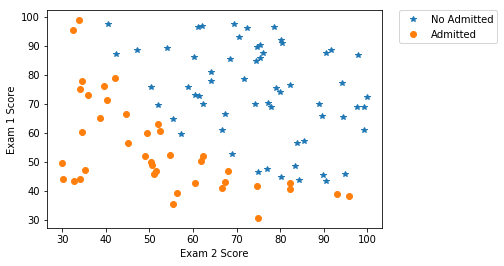

In [943]:
data = np.loadtxt('ex2data1.txt', comments='#', delimiter=",");
#print(data);
X = data[:, [0, 1]];
y = data[:, 2];
y = y.reshape(y.size, 1);
print(['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']);

def plotData(X, y, label1='Exam 1 Score', label2='Exam 2 Score', legend1="No Admitted", legend2="Admitted"):
    pos, vals = np.nonzero(y==1);
    neg, vals = np.nonzero(y==0);
    plt.plot(X[pos, 0], X[pos, 1], '*', label=legend1 );
    plt.plot(X[neg, 0], X[neg, 1], 'o', label=legend2);
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.ylabel(label1);
    plt.xlabel(label2);
    plt.show();

plotData(X, y);



In [944]:
m, n = X.shape;
X = np.c_[np.ones(m),X]
initial_theta = np.zeros((n + 1, 1));
initial_theta = np.c_[initial_theta]


In [945]:
def sigmoid(z):
    g = np.zeros(z.shape);
    g = 1 / (1 + np.exp(-z));
    return g;


def costFunction(theta, X, y, lem=0):
    m = len(y);
    J = 0;
    h = sigmoid(X.dot(theta));
    logminush = np.log(1 - (h))
    logh = np.log(h)
    #J = (1 / m) * np.sum(np.multiply(-y, logh) - np.multiply((1 - y), logminush));
    J = (1 / m) * np.sum((-y.T.dot(logh)) - ((1 - y).T.dot(logminush)));
    #J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))    
    reg = (lem/(2*m)) * np.sum(np.square(theta))
    J = J + reg
    return J;   

def gradient(theta, X, y):
    m = len(y);
    h = sigmoid(X.dot(theta.reshape(-1,1)));
    grad = np.zeros(theta.shape);
    grad = (1 / m) * X.T.dot((h - y));    
    return grad.flatten();

def plotDecisionBoundary(theta, X, y): 
    #plotData(X[:,1:3], y);
    new_X = X[:,1:3];
    pos, vals = np.nonzero(y==1);
    neg, vals = np.nonzero(y==0);
    plt.plot(new_X[pos, 0], new_X[pos, 1], '*', label="Admitted" );
    plt.plot(new_X[neg, 0], new_X[neg, 1], 'o', label="No Admitted");
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.ylabel('Exam 1 Score');
    plt.xlabel('Exam 2 Score');
    
    x1_min, x1_max = X[:,1].min(), X[:,1].max();
    x2_min, x2_max = X[:,2].min(), X[:,2].max();
    
    #copied
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max));
    
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x));
    
    h = h.reshape(xx1.shape);
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');
    

def predict(theta, X):
    p = np.zeros((X.size, 1));
    p = sigmoid(X.dot(theta));
    for i in range(p.size):
        if (p[i] >= 0.5):
            p[i] = 1;
        else:
            p[i] = 0;
    return p;

def mapFeature(X1, X2):
    degree = 5;
    out = np.ones(X1.size);
    for i in range(0, degree):
        for j in range(0, i):
            #out(:, end+1) = (X1.^(i-j)).*(X2.^j);
            cal = (X1**(i-j) * (X2**j));
            out = np.c_[out, cal];
    
    return out;
    

In [946]:
cost = costFunction(initial_theta, X, y);
grad = gradient(initial_theta, X, y);
print('Cost at initial theta (zeros):\n', cost);
print('Gradient at initial theta (zeros): \n');
print('\n', grad);

test_theta = np.array([[-24], [0.2], [0.2]]);
cost = costFunction(test_theta, X, y);
grad = grad = gradient(test_theta, X, y);
print('\nCost at test theta: \n', cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: \n');
print('\n', grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros):
 0.6931471805599452
Gradient at initial theta (zeros): 


 [ -0.1        -12.00921659 -11.26284221]

Cost at test theta: 
 0.21833019382659785
Expected cost (approx): 0.218

Gradient at test theta: 


 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [947]:
import scipy.optimize as opt
#options = optimset('GradObj', 'on', 'MaxIter', 400);
#[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);
res = opt.minimize(costFunction, test_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
print(res)
print('Cost at theta found by fminunc:\n', res.fun);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print('\n', res.x);
print('Expected theta (approx):\n');
print(' -25.161 0.206 0.201');
theta = res.x;

      fun: 0.203497701589442
 hess_inv: array([[ 3.33350099e+03, -2.66055767e+01, -2.69764676e+01],
       [-2.66055767e+01,  2.27032698e-01,  2.02191103e-01],
       [-2.69764676e+01,  2.02191103e-01,  2.33923485e-01]])
      jac: array([-1.29877863e-08, -9.15436292e-07, -7.66847112e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 16
     njev: 22
   status: 0
  success: True
        x: array([-25.16133175,   0.2062317 ,   0.20147159])
Cost at theta found by fminunc:
 0.203497701589442
Expected cost (approx): 0.203

theta: 


 [-25.16133175   0.2062317    0.20147159]
Expected theta (approx):

 -25.161 0.206 0.201


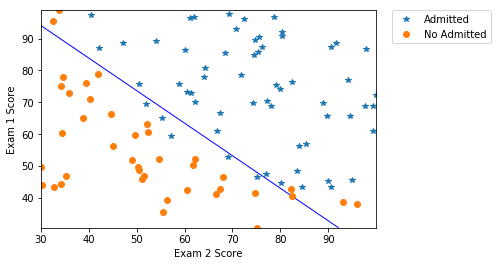

In [948]:
plotDecisionBoundary(theta, X, y);

In [949]:
theta = theta.reshape(theta.size, 1)
prob = sigmoid(np.array([[1], [45], [85]]).T.dot(theta));
print('For a student with scores 45 and 85, we predict an admission probability of \n\n', prob);


For a student with scores 45 and 85, we predict an admission probability of 

 [[0.77629065]]


In [950]:
pred = predict(theta, X);
pred = pred.reshape(pred.size, 1)
print(np.sum(y))
print('Train Accuracy: \n', (np.mean(pred == y)) * 100);

60.0
Train Accuracy: 
 89.0


In [951]:
# start ex2 with reg

['Plotting data']


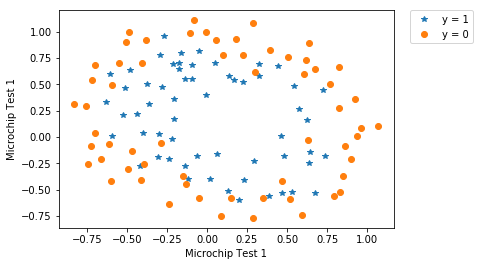

In [952]:
#data = load('ex2data2.txt');
#X = data(:, [1, 2]); y = data(:, 3);

data = np.loadtxt('ex2data2.txt', comments='#', delimiter=",");

X = data[:, [0, 1]];
y = data[:, 2];
y = y.reshape(y.size, 1);
print(['Plotting data']);

plotData(X, y, 'Microchip Test 1', 'Microchip Test 1', 'y = 1', 'y = 0');


In [953]:
X = mapFeature(X[:, 0], X[:, 1]);

In [954]:
m, n = X.shape;
initial_theta = np.zeros((n, 1));
initial_theta = np.c_[initial_theta];
initial_theta
lam = 1;
cost = costFunction(initial_theta, X, y, lam)
print('Cost at initial theta (zeros): \n', cost);
print('Expected cost (approx): 0.693\n');

#grad = gradient(initial_theta, X, y);
#https://github.com/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb


Cost at initial theta (zeros): 
 0.6931471805599453
Expected cost (approx): 0.693

